# ACTIVIDAD 2

## 0.  Modificar el dataset para que cada vez que en prec se encuente el valor 0,0 se considere que no llueve, para los demas valores se va a considerar que si ha llovido

In [1]:
#Importamos las librerías que nos vayan a ser necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import clone
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
from tabulate import tabulate
from scipy import stats
import warnings

# Ignorar avisos específicos
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
#Cargamos el dataset nuestro de la Actividad 1
ruta_fichero = 'C:/Users/alvar/Documentos/Europea/Europea/3º INFORMÁTICA/IA/PRÁCTICA NAVIDAD/datos_meteorologicos_SELECTED_ATRIBUTES.csv'
fichero = pd.read_csv(ruta_fichero)

In [4]:
# Modificar el dataset
# Reemplazar 'Ip' y convertir 'prec' a float
fichero['prec'] = fichero['prec'].replace('Ip', '0.1').str.replace(',', '.').astype(float)

In [5]:
# Creamos la columna 'lluvia' para saber claramente si llovió o no
fichero['lluvia'] = fichero['prec'] != 0.0
''''para cada fila en el DataFrame, si el valor en la columna 'prec'
es diferente de 0.0, la columna 'lluvia' para esa fila tendrá el valor True
indicando que ha llovido. Si el valor en 'prec' es 0.0, entonces 'lluvia' será False, indicando que no ha llovido'''

"'para cada fila en el DataFrame, si el valor en la columna 'prec'\nes diferente de 0.0, la columna 'lluvia' para esa fila tendrá el valor True\nindicando que ha llovido. Si el valor en 'prec' es 0.0, entonces 'lluvia' será False, indicando que no ha llovido"

In [6]:
# Guardamos el dataset modificado
nombre_archivo = 'datos_meteorologicos_modificados.csv'
fichero.to_csv(nombre_archivo, index=False)

## 1. Análisis exploratorio

In [7]:
# Descripción básica del dataset
# Cargamos el archivo modificado en un DataFrame
fichero_modificado = pd.read_csv(nombre_archivo)
# Utilizamos df.describe() para obtener estadísticas resumidas de las columnas numéricas
descripcion_basica_modificado = fichero_modificado.describe()
descripcion_basica_modificado

,altitud,prec,dir
count,7596.000000,7311.000000,6932.000000
mean,447.777120,3.144686,26.561454
std,439.099238,9.119541,23.583723
min,2.000000,0.000000,1.000000
25%,51.000000,0.000000,14.000000
50%,372.000000,0.000000,22.000000
75%,715.000000,1.200000,27.000000
max,2369.000000,121.400000,99.000000


### Count: Nos muestra la cantidad de entradas no nulas en cada columna. Podemos ver que 'altitud' tiene 7596 entradas no nulas, 'prec' tiene 7311, y 'dir' tiene 6932.
### Media (mean): Es el promedio de los valores en cada columna. Por ejemplo, la altitud media es aproximadamente 447.77. Esto puede ser útil para entender la altitud promedio de las estaciones meteorológicas.
### Desviación estándar (std): Indica cuánto varían los valores respecto a la media. Una desviación estándar más alta significa mayor variabilidad. Por ejemplo, la altitud tiene una alta variabilidad con una desviación estándar de aproximadamente 439.09.
### min y max: Son los valores más bajos y más altos en cada columna. En 'prec', un mínimo de 0 indica días sin lluvia, y el máximo de 121.4 sugiere un evento de precipitación muy significativo.

In [8]:
# Revisamos los tipos de datos
fichero_modificado.dtypes

altitud       int64
tmed         object
prec        float64
tmin         object
tmax         object
dir         float64
velmedia     object
racha        object
presMax      object
presMin      object
lluvia         bool
dtype: object

In [9]:
# Pasamos todos los datos tipo 'object' a float con 'replace' 
for column in ['tmed', 'tmin', 'tmax', 'velmedia', 'racha', 'presMax', 'presMin']:
    if fichero_modificado[column].dtype == object:
        # Reemplazar comas por puntos y convertir a float
        fichero_modificado[column] = fichero_modificado[column].str.replace(',', '.').astype(float)

In [10]:
# Comprobamos que se ha cambiado
fichero_modificado.dtypes

altitud       int64
tmed        float64
prec        float64
tmin        float64
tmax        float64
dir         float64
velmedia    float64
racha       float64
presMax     float64
presMin     float64
lluvia         bool
dtype: object

In [11]:
# Buscamos las columnas que tienen valores faltantes
fichero_modificado.isnull().sum()

altitud        0
tmed         402
prec         285
tmin         402
tmax         399
dir          664
velmedia     635
racha        664
presMax     1918
presMin     1919
lluvia         0
dtype: int64

In [12]:
'''Para gestionar los missing values, hemos decidido reemplazar los valores faltantes 
con la mediana de cada variable numérica,ya que es menos sensible a los valores atípicos que la media.
Utilizaremos el método 'fillna()' junto con el método 'median()' de Pandas.'''
# Para cada columna, calcula la mediana y luego reemplaza los valores faltantes con esa mediana
fichero_modificado['tmed'] = fichero_modificado['tmed'].fillna(fichero_modificado['tmed'].median())
fichero_modificado['prec'] = fichero_modificado['prec'].fillna(fichero_modificado['prec'].median())
fichero_modificado['tmin'] = fichero_modificado['tmin'].fillna(fichero_modificado['tmin'].median())
fichero_modificado['tmax'] = fichero_modificado['tmax'].fillna(fichero_modificado['tmax'].median())
fichero_modificado['dir'] = fichero_modificado['dir'].fillna(fichero_modificado['dir'].median())
fichero_modificado['velmedia'] = fichero_modificado['velmedia'].fillna(fichero_modificado['velmedia'].median())
fichero_modificado['racha'] = fichero_modificado['racha'].fillna(fichero_modificado['racha'].median())
fichero_modificado['presMax'] = fichero_modificado['presMax'].fillna(fichero_modificado['presMax'].median())
fichero_modificado['presMin'] = fichero_modificado['presMin'].fillna(fichero_modificado['presMin'].median())

In [13]:
# Guardamos el dataset modificado
nombre_archivo = 'datos_meteorologicos_modificados.csv'
fichero_modificado.to_csv(nombre_archivo, index=False)
# Comprobamos que se ha hecho correctamente el cambio en los missing values y ya no queda ninguno en nuestro dataset
fichero_modificado.isnull().sum()

altitud     0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
racha       0
presMax     0
presMin     0
lluvia      0
dtype: int64

In [14]:
# Explorar Relaciones y Correlaciones:
# Examinamos cómo se relacionan las columnas numéricas entre sí, y si hay patrones o correlaciones interesantes.
correlaciones = fichero_modificado.corr()
print(correlaciones)

           altitud      tmed      prec      tmin      tmax       dir  \
altitud   1.000000 -0.529313  0.092585 -0.591548 -0.385121 -0.065891   
tmed     -0.529313  1.000000 -0.277496  0.864729  0.924392  0.013558   
prec      0.092585 -0.277496  1.000000 -0.145642 -0.327544 -0.012637   
tmin     -0.591548  0.864729 -0.145642  1.000000  0.608378  0.037608   
tmax     -0.385121  0.924392 -0.327544  0.608378  1.000000 -0.006581   
dir      -0.065891  0.013558 -0.012637  0.037608 -0.006581  1.000000   
velmedia  0.000931 -0.145594  0.222976  0.059357 -0.275195  0.048509   
racha     0.096620 -0.306247  0.372869 -0.100799 -0.406830 -0.012969   
presMax  -0.884753  0.541961 -0.131232  0.568264  0.423537  0.061951   
presMin  -0.877766  0.559933 -0.153743  0.577471  0.444860  0.061049   
lluvia    0.111468 -0.456720  0.408310 -0.246183 -0.534968  0.008615   

          velmedia     racha   presMax   presMin    lluvia  
altitud   0.000931  0.096620 -0.884753 -0.877766  0.111468  
tmed     -0.1

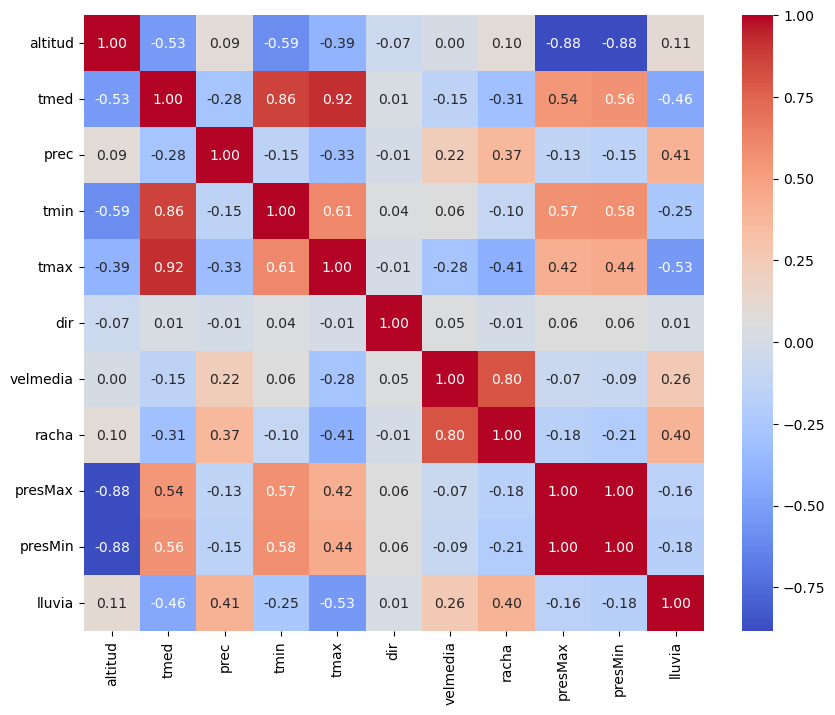

In [15]:
# Creamos un mapa de calor a partir de la matriz de correlación para ver más fácilmente si hay correlaciones interesantes
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

##### Temperatura (tmed, tmin, tmax): Estas variables muestran una correlación positiva fuerte entre sí (valores rojos y cercanos a 1), lo cual es esperable ya que están relacionadas con la temperatura y tienden a moverse juntas.

##### Altitud y Presión (presMax, presMin): La altitud parece tener una correlación negativa fuerte con presMax y presMin (valores azules oscuros cercanos a -1), lo cual tiene sentido con el conocimiento de que la presión atmosférica disminuye con la altitud.

##### Velocidad del Viento (velmedia y racha): Hay una correlación positiva fuerte entre velmedia y racha, lo que sugiere que los días con velocidades medias de viento más altas también tienden a tener ráfagas de viento más fuertes.

##### Precipitación (prec) y Lluvia (lluvia): La correlación entre prec y lluvia (correlación positiva) es de esperar, ya que la columna 'lluvia' fue derivada de 'prec' para indicar la presencia o ausencia de precipitación.

##### Altitud y Temperatura (tmed, tmin, tmax): La altitud parece tener una correlación negativa con las variables de temperatura, lo que podría reflejar el fenómeno físico por el cual las temperaturas tienden a ser más bajas en altitudes más altas.'''